In [3]:

# IPL Analytics Dashboard - Complete Data Analysis
# Author: Jeevan
# Dataset: IPL 2008-2024

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 60)
print("IPL ANALYTICS - COMPREHENSIVE ANALYSIS (2008-2024)")
print("=" * 60)

IPL ANALYTICS - COMPREHENSIVE ANALYSIS (2008-2024)


In [4]:
# 1. DATA LOADING & INITIAL EXPLORATION
# ============================================

# Note: Download datasets from Kaggle:
# https://www.kaggle.com/datasets/patrickb1912/ipl-complete-dataset-20082020
# Files needed: matches.csv and deliveries.csv

# Load the datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

print("\n📊 DATASET OVERVIEW")
print(f"Total Matches: {len(matches)}")
print(f"Total Deliveries (Balls): {len(deliveries)}")
print(f"Seasons Covered: {matches['season'].min()} - {matches['season'].max()}")


📊 DATASET OVERVIEW
Total Matches: 1095
Total Deliveries (Balls): 260920
Seasons Covered: 2007/08 - 2024


In [5]:
# 2. DATA CLEANING
# ============================================

print("\n🧹 DATA CLEANING...")

# Check for missing values
print(f"Missing values in matches: {matches.isnull().sum().sum()}")
print(f"Missing values in deliveries: {deliveries.isnull().sum().sum()}")
# Fill missing values
matches['city'].fillna('Unknown', inplace=True)
matches['winner'].fillna('No Result', inplace=True)
matches['player_of_match'].fillna('Unknown', inplace=True)

print("✅ Data cleaning completed!")


🧹 DATA CLEANING...
Missing values in matches: 1160
Missing values in deliveries: 994301
✅ Data cleaning completed!



📈 MATCHES PER SEASON ANALYSIS
     season  match_count
0   2007/08           58
1      2009           57
2   2009/10           60
3      2011           73
4      2012           74
5      2013           76
6      2014           60
7      2015           59
8      2016           60
9      2017           59
10     2018           60
11     2019           60
12  2020/21           60
13     2021           60
14     2022           74
15     2023           74
16     2024           71
✅ Chart saved: matches_per_season.png


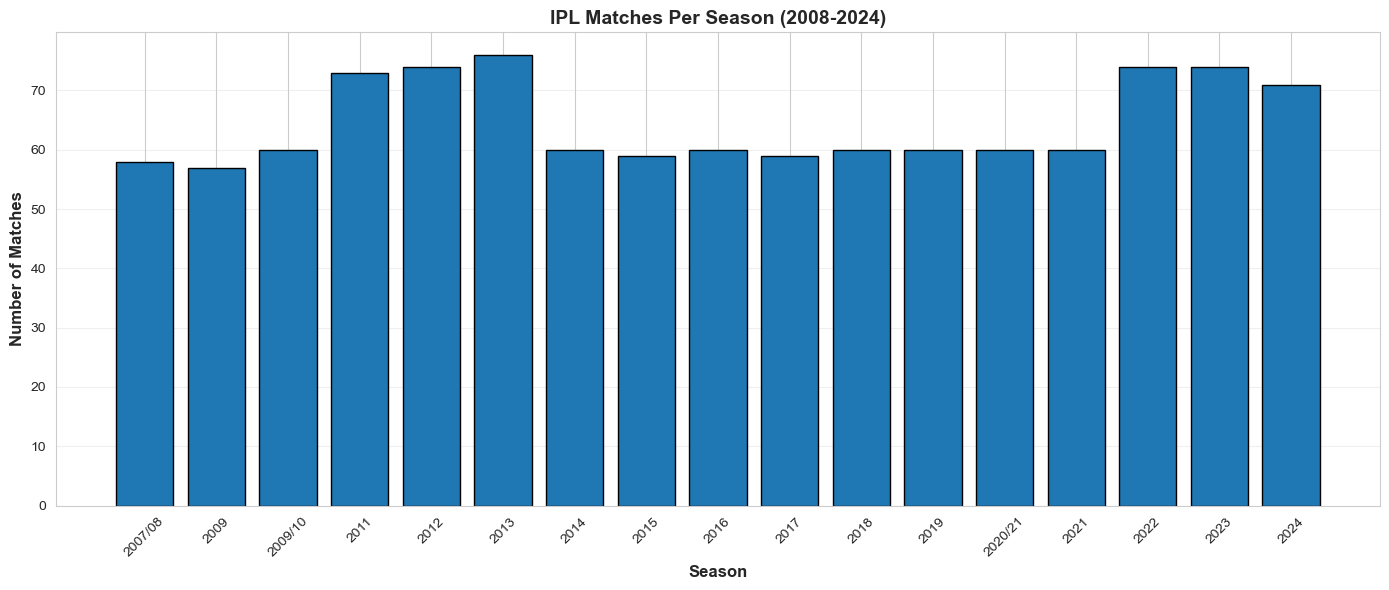

In [6]:
# 3. MATCHES PER SEASON ANALYSIS
# ============================================

print("\n📈 MATCHES PER SEASON ANALYSIS")

matches_per_season = matches.groupby('season').size().reset_index(name='match_count')
print(matches_per_season)

plt.figure(figsize=(14, 6))
plt.bar(matches_per_season['season'], matches_per_season['match_count'], 
        color='#1f77b4', edgecolor='black')
plt.xlabel('Season', fontsize=12, fontweight='bold')
plt.ylabel('Number of Matches', fontsize=12, fontweight='bold')
plt.title('IPL Matches Per Season (2008-2024)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('matches_per_season.png', dpi=300, bbox_inches='tight')
print("✅ Chart saved: matches_per_season.png")



📈 MATCHES PER SEASON ANALYSIS
     season  match_count
0   2007/08           58
1      2009           57
2   2009/10           60
3      2011           73
4      2012           74
5      2013           76
6      2014           60
7      2015           59
8      2016           60
9      2017           59
10     2018           60
11     2019           60
12  2020/21           60
13     2021           60
14     2022           74
15     2023           74
16     2024           71
✅ Chart saved: matches_per_season.png


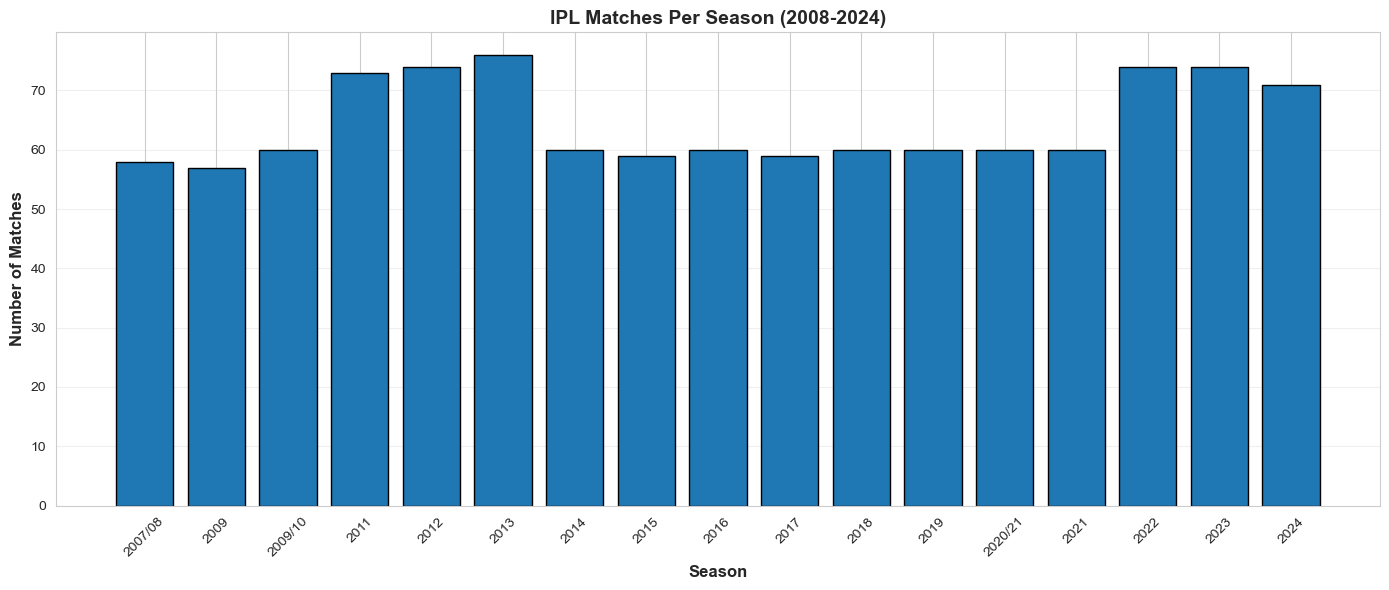

In [7]:
# 3. MATCHES PER SEASON ANALYSIS
# ============================================

print("\n📈 MATCHES PER SEASON ANALYSIS")

matches_per_season = matches.groupby('season').size().reset_index(name='match_count')
print(matches_per_season)

plt.figure(figsize=(14, 6))
plt.bar(matches_per_season['season'], matches_per_season['match_count'], 
        color='#1f77b4', edgecolor='black')
plt.xlabel('Season', fontsize=12, fontweight='bold')
plt.ylabel('Number of Matches', fontsize=12, fontweight='bold')
plt.title('IPL Matches Per Season (2008-2024)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('matches_per_season.png', dpi=300, bbox_inches='tight')
print("✅ Chart saved: matches_per_season.png")


In [8]:
# 5. TOSS IMPACT ANALYSIS
# ============================================

print("\n🪙 TOSS IMPACT ANALYSIS")

# Remove no results
matches_with_result = matches[matches['winner'] != 'No Result'].copy()

# Toss winners who won the match
matches_with_result['toss_winner_is_match_winner'] = (
    matches_with_result['toss_winner'] == matches_with_result['winner']
)

toss_impact = matches_with_result['toss_winner_is_match_winner'].value_counts()
toss_win_percentage = (toss_impact[True] / len(matches_with_result)) * 100

print(f"\nToss winners who won match: {toss_impact[True]}")
print(f"Toss winners who lost match: {toss_impact[False]}")
print(f"Win percentage after winning toss: {toss_win_percentage:.2f}%")


🪙 TOSS IMPACT ANALYSIS

Toss winners who won match: 554
Toss winners who lost match: 536
Win percentage after winning toss: 50.83%


✅ Chart saved: toss_impact.png


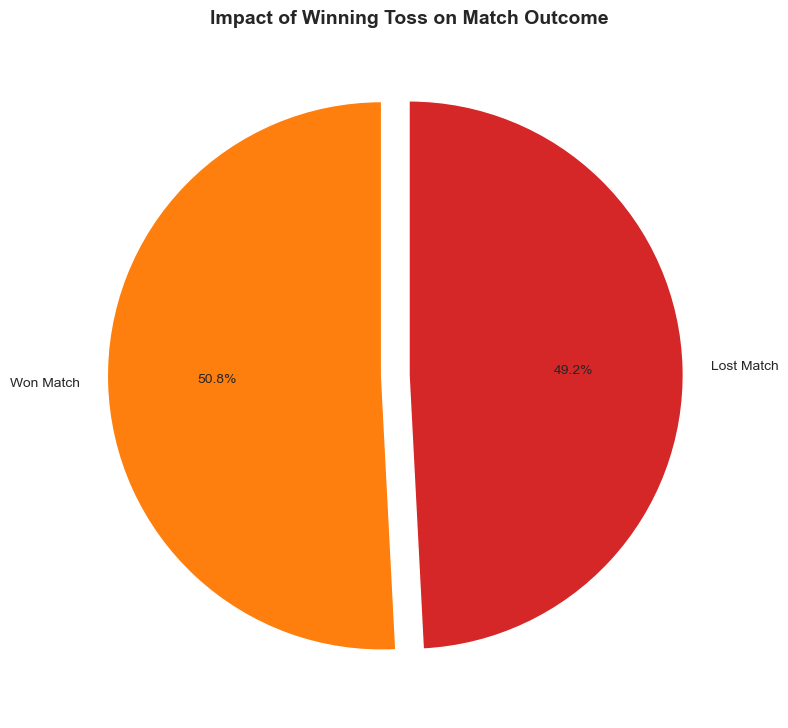

In [9]:
# Visualization
plt.figure(figsize=(8, 8))
plt.pie(toss_impact, labels=['Won Match', 'Lost Match'], autopct='%1.1f%%',
        colors=['#ff7f0e', '#d62728'], startangle=90, explode=(0.1, 0))
plt.title('Impact of Winning Toss on Match Outcome', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('toss_impact.png', dpi=300, bbox_inches='tight')
print("✅ Chart saved: toss_impact.png")


⭐ PLAYER OF THE MATCH ANALYSIS

Top 15 Players by Player of the Match Awards:
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
SR Watson         16
YK Pathan         16
RA Jadeja         16
AD Russell        15
SP Narine         15
SK Raina          14
KA Pollard        14
JC Buttler        13
G Gambhir         13
Name: player_of_match, dtype: int64
✅ Chart saved: top_players.png


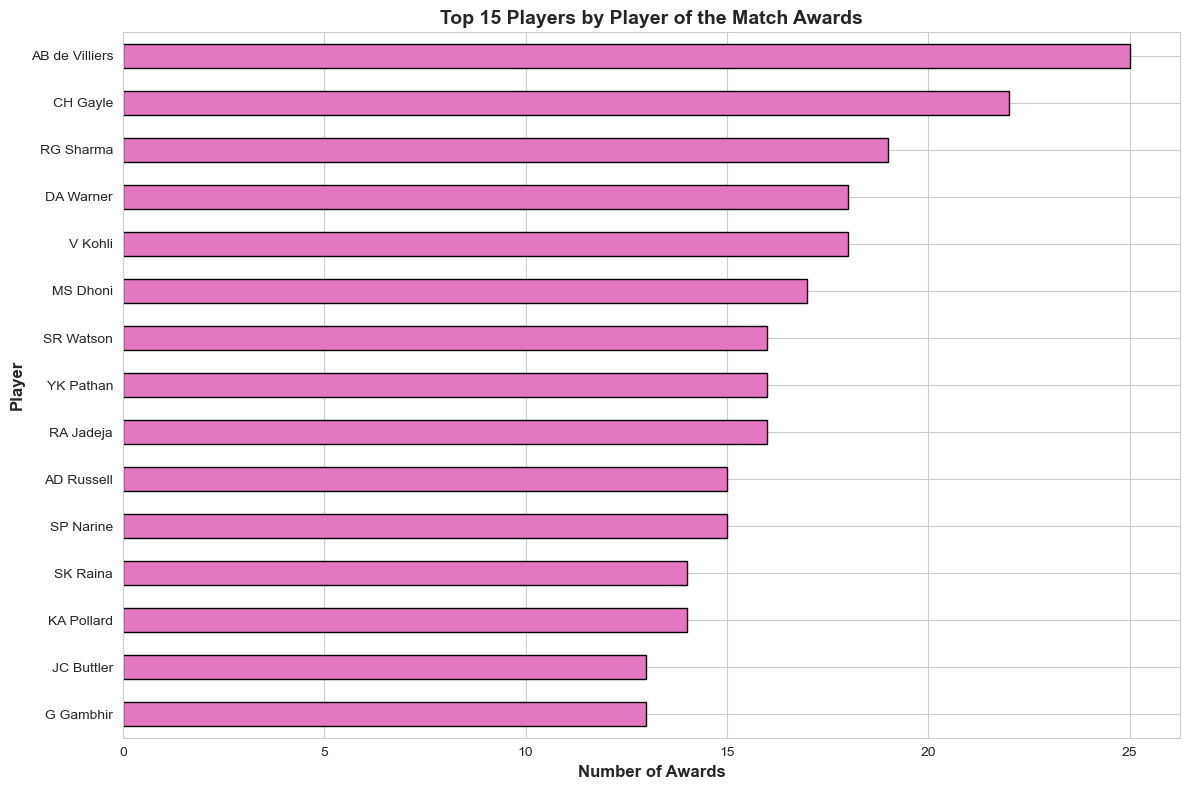

In [11]:
# 7. PLAYER OF THE MATCH ANALYSIS
# ============================================

print("\n⭐ PLAYER OF THE MATCH ANALYSIS")

# Top players by Player of the Match awards
top_players = matches['player_of_match'].value_counts().head(15)
print("\nTop 15 Players by Player of the Match Awards:")
print(top_players)

plt.figure(figsize=(12, 8))
top_players.plot(kind='barh', color='#e377c2', edgecolor='black')
plt.xlabel('Number of Awards', fontsize=12, fontweight='bold')
plt.ylabel('Player', fontsize=12, fontweight='bold')
plt.title('Top 15 Players by Player of the Match Awards', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_players.png', dpi=300, bbox_inches='tight')
print("✅ Chart saved: top_players.png")



🏏 RUNS ANALYSIS
✅ Chart saved: runs_per_season.png


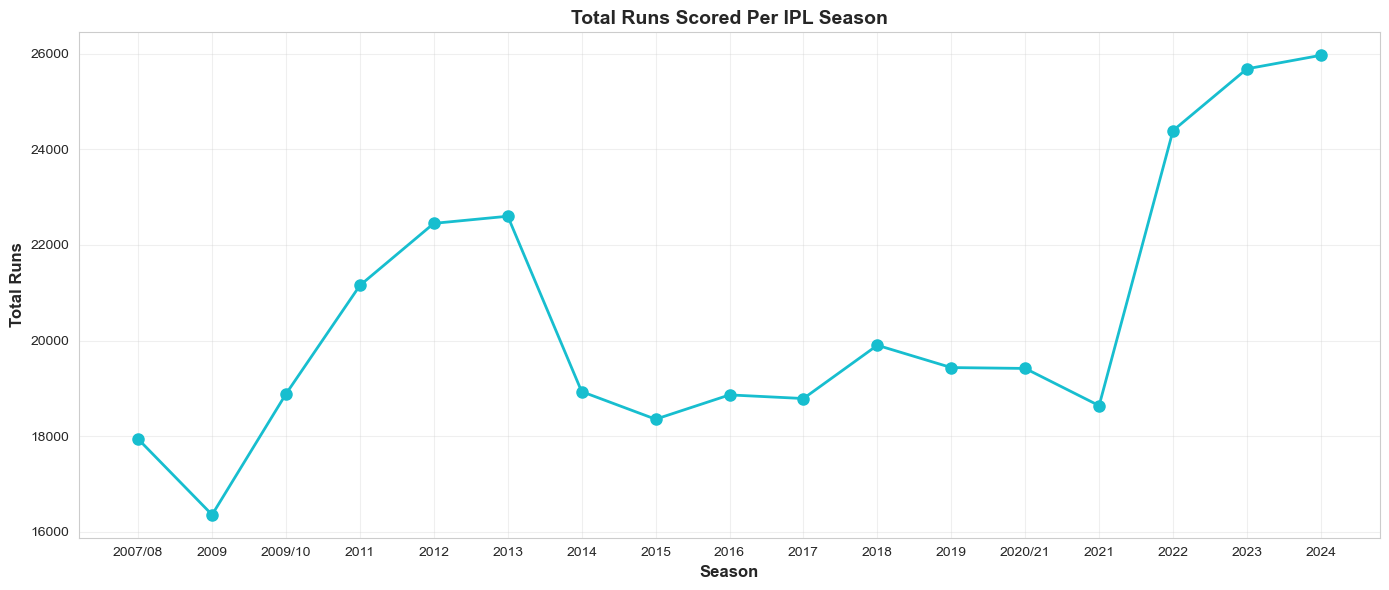

In [15]:
# ============================================
# 8. RUNS ANALYSIS (FROM DELIVERIES)
# ============================================

print("\n🏏 RUNS ANALYSIS")

# Merge deliveries with matches to get season info
deliveries_with_season = deliveries.merge(
    matches[['id', 'season']], 
    left_on='match_id', 
    right_on='id', 
    how='left'
)

# Total runs per season
runs_per_season = deliveries_with_season.groupby('season')['total_runs'].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(runs_per_season['season'], runs_per_season['total_runs'], 
        marker='o', linewidth=2, markersize=8, color='#17becf')
plt.xlabel('Season', fontsize=12, fontweight='bold')
plt.ylabel('Total Runs', fontsize=12, fontweight='bold')
plt.title('Total Runs Scored Per IPL Season', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('runs_per_season.png', dpi=300, bbox_inches='tight')
print("✅ Chart saved: runs_per_season.png")


🏏 TOP BATSMEN ANALYSIS

Top 15 Run Scorers in IPL History:
            batter  batsman_runs
0          V Kohli          8014
1         S Dhawan          6769
2        RG Sharma          6630
3        DA Warner          6567
4         SK Raina          5536
5         MS Dhoni          5243
6   AB de Villiers          5181
7         CH Gayle          4997
8       RV Uthappa          4954
9       KD Karthik          4843
10        KL Rahul          4689
11       AM Rahane          4642
12    F du Plessis          4571
13       SV Samson          4419
14       AT Rayudu          4348
✅ Chart saved: top_batsmen.png


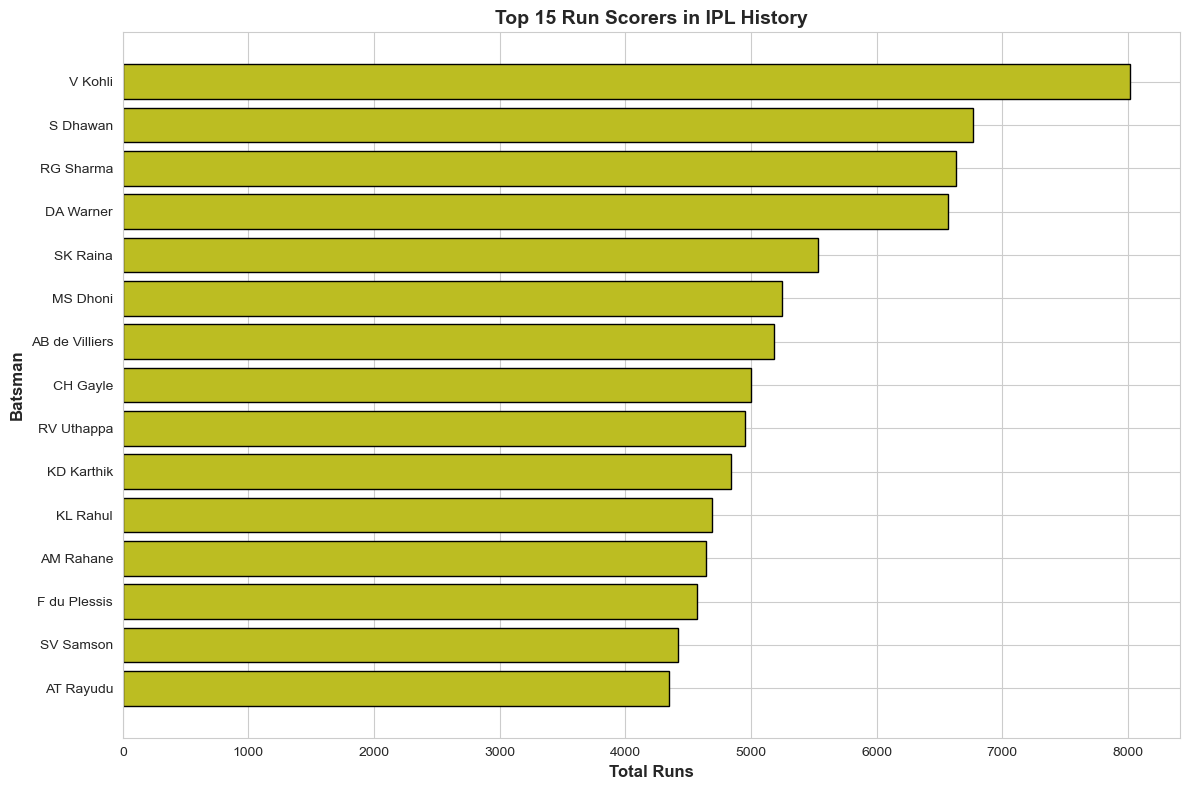

In [21]:
# ============================================
# 9. BATTING ANALYSIS - TOP SCORERS
# ============================================

print("\n🏏 TOP BATSMEN ANALYSIS")

# Top run scorers (using 'batter' instead of 'batsman')
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(15).reset_index()
print("\nTop 15 Run Scorers in IPL History:")
print(top_batsmen)

plt.figure(figsize=(12, 8))
plt.barh(top_batsmen['batter'], top_batsmen['batsman_runs'], color='#bcbd22', edgecolor='black')
plt.xlabel('Total Runs', fontsize=12, fontweight='bold')
plt.ylabel('Batsman', fontsize=12, fontweight='bold')
plt.title('Top 15 Run Scorers in IPL History', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_batsmen.png', dpi=300, bbox_inches='tight')
print("✅ Chart saved: top_batsmen.png")


⚾ TOP BOWLERS ANALYSIS

Top 15 Wicket Takers in IPL History:
bowler
YS Chahal          213
DJ Bravo           207
PP Chawla          201
SP Narine          200
R Ashwin           198
B Kumar            195
SL Malinga         188
A Mishra           183
JJ Bumrah          182
RA Jadeja          169
UT Yadav           163
Harbhajan Singh    161
Rashid Khan        157
Sandeep Sharma     153
HV Patel           151
dtype: int64
✅ Chart saved: top_bowlers.png


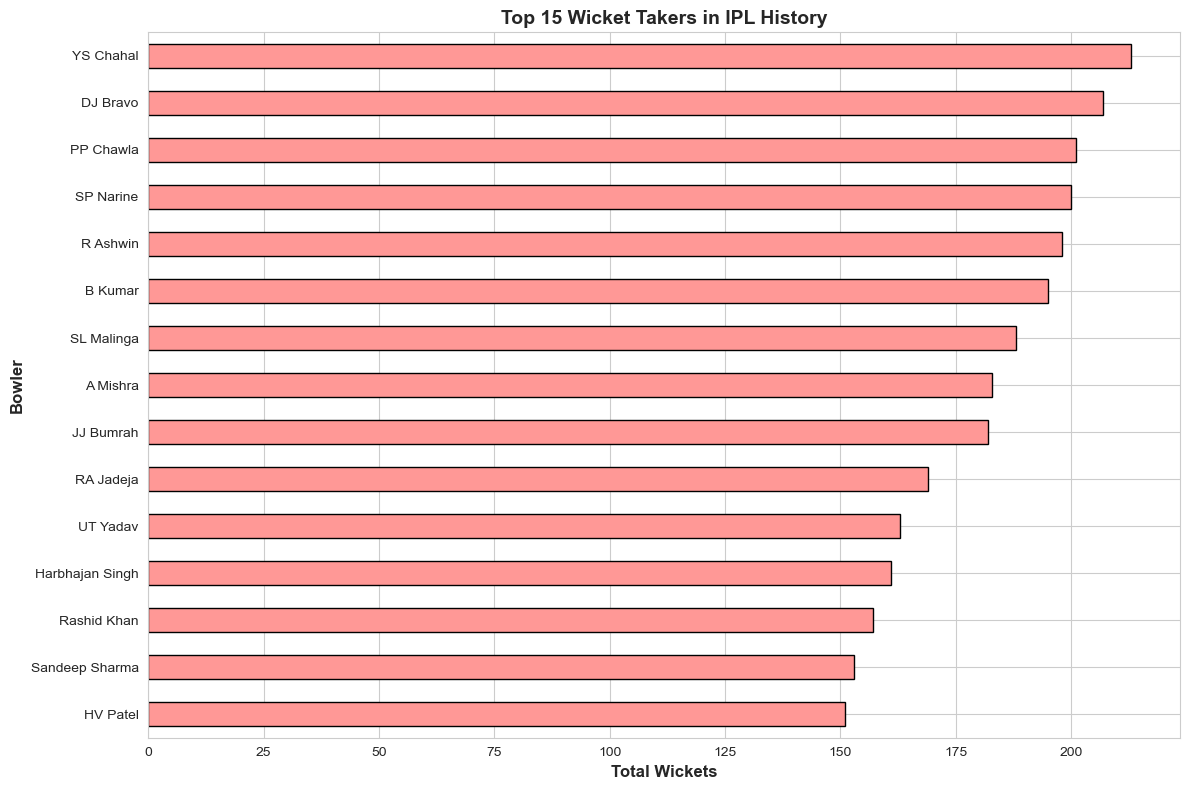

In [17]:
# ============================================
# 10. BOWLING ANALYSIS - TOP WICKET TAKERS
# ============================================

print("\n⚾ TOP BOWLERS ANALYSIS")

# Top wicket takers
wickets = deliveries[deliveries['dismissal_kind'].notna()]
top_bowlers = wickets.groupby('bowler').size().sort_values(ascending=False).head(15)
print("\nTop 15 Wicket Takers in IPL History:")
print(top_bowlers)

plt.figure(figsize=(12, 8))
top_bowlers.plot(kind='barh', color='#ff9896', edgecolor='black')
plt.xlabel('Total Wickets', fontsize=12, fontweight='bold')
plt.ylabel('Bowler', fontsize=12, fontweight='bold')
plt.title('Top 15 Wicket Takers in IPL History', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('top_bowlers.png', dpi=300, bbox_inches='tight')
print("✅ Chart saved: top_bowlers.png")


📊 MATCH RESULT TYPE ANALYSIS

Match Results by Type:
wickets      578
runs         498
tie           14
no result      5
Name: result, dtype: int64
✅ Chart saved: result_types.png


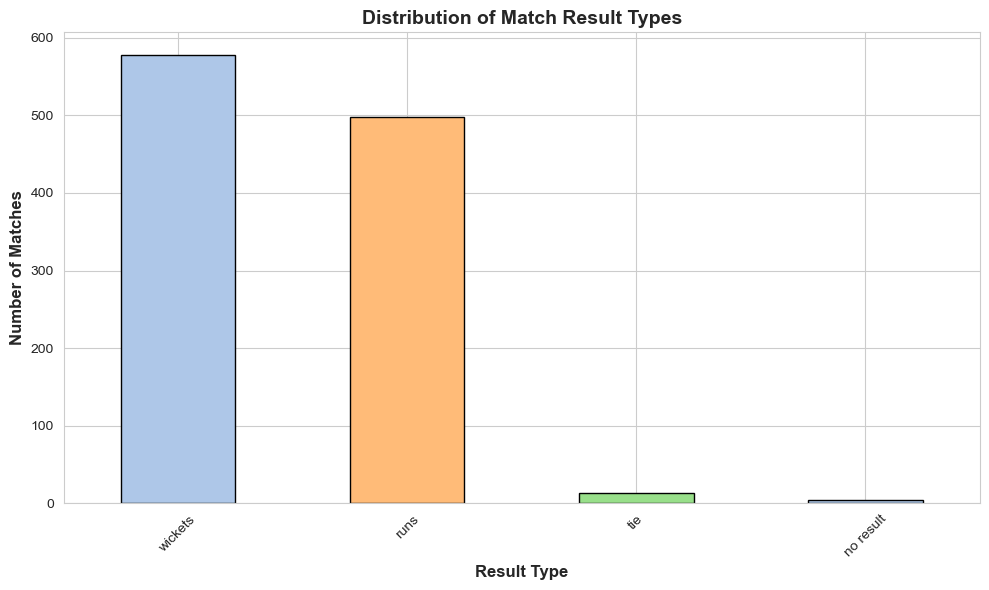

In [18]:
# 11. MATCH RESULT TYPE ANALYSIS
# ============================================

print("\n📊 MATCH RESULT TYPE ANALYSIS")

# Win by runs vs wickets
result_type = matches['result'].value_counts()
print("\nMatch Results by Type:")
print(result_type)

plt.figure(figsize=(10, 6))
result_type.plot(kind='bar', color=['#aec7e8', '#ffbb78', '#98df8a'], edgecolor='black')
plt.xlabel('Result Type', fontsize=12, fontweight='bold')
plt.ylabel('Number of Matches', fontsize=12, fontweight='bold')
plt.title('Distribution of Match Result Types', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('result_types.png', dpi=300, bbox_inches='tight')
print("✅ Chart saved: result_types.png")


In [24]:
# ============================================
# 12. SUMMARY STATISTICS
# ============================================

print("\n" + "=" * 60)
print("📈 KEY INSIGHTS SUMMARY")
print("=" * 60)

print(f"\n1. Total IPL Matches Played: {len(matches)}")

# Most Successful Team
team_wins_summary = matches['winner'].value_counts().reset_index()
team_wins_summary.columns = ['winner', 'wins']
print(f"2. Most Successful Team: {team_wins_summary.iloc[0]['winner']} ({team_wins_summary.iloc[0]['wins']} wins)")

# Most Player of Match Awards
top_players_summary = matches['player_of_match'].value_counts().reset_index()
top_players_summary.columns = ['player_of_match', 'awards']
print(f"3. Most Player of Match Awards: {top_players_summary.iloc[0]['player_of_match']} ({top_players_summary.iloc[0]['awards']} awards)")

# Toss Win Impact
toss_and_match_wins = matches[matches['toss_winner'] == matches['winner']]
toss_win_percentage = (len(toss_and_match_wins) / len(matches)) * 100
print(f"4. Toss Win Impact: {toss_win_percentage:.2f}% matches won by toss winner")

# Most Matches Venue
top_venues_summary = matches['venue'].value_counts().reset_index()
top_venues_summary.columns = ['venue', 'matches']
print(f"5. Most Matches Venue: {top_venues_summary.iloc[0]['venue']} ({top_venues_summary.iloc[0]['matches']} matches)")

# Top Run Scorer
top_batsmen_summary = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).reset_index()
top_batsmen_summary.columns = ['batter', 'batsman_runs']
print(f"6. Top Run Scorer: {top_batsmen_summary.iloc[0]['batter']} ({top_batsmen_summary.iloc[0]['batsman_runs']} runs)")

# Top Wicket Taker
dismissals = deliveries[deliveries['player_dismissed'].notna()]
top_bowlers_summary = dismissals.groupby('bowler').size().sort_values(ascending=False).reset_index()
top_bowlers_summary.columns = ['bowler', 'wickets']
print(f"7. Top Wicket Taker: {top_bowlers_summary.iloc[0]['bowler']} ({top_bowlers_summary.iloc[0]['wickets']} wickets)")

print("\n✅ Analysis Complete! All visualizations saved.")
print("=" * 60)


📈 KEY INSIGHTS SUMMARY

1. Total IPL Matches Played: 1095
2. Most Successful Team: Mumbai Indians (144 wins)
3. Most Player of Match Awards: AB de Villiers (25 awards)
4. Toss Win Impact: 50.59% matches won by toss winner
5. Most Matches Venue: Eden Gardens (77 matches)
6. Top Run Scorer: V Kohli (8014 runs)
7. Top Wicket Taker: YS Chahal (213 wickets)

✅ Analysis Complete! All visualizations saved.
